<h1>2 &nbsp; Solução analítica</h1>

<h2>2.1 &nbsp; Solução da equação diferencial</h2>

&nbsp; O modelo populacional de Malthus é dado por:

$$\frac{dP}{dt}=κP$$
,
onde <b>P</b> é o número de habitantes e <b>κ</b> a constante de proporcionalidade. 
<br>
&nbsp; Podemos escrever o problema enunciado na <b>Seção 1</b> como um problema de contorno:

$$\begin{cases} \frac{dP}{dt}=κP  \\ P(0)= 186 \: 488 \\ P(10)= 197 \: 228 \end{cases}$$

&nbsp; Inicialmente, obtemos a solução da equação diferencial por separação de variáveis:

$$\frac{dP}{dt}=κP \Rightarrow \frac{dP}{κP}=dt $$

&nbsp; Integrando a equação:

$$ \int\frac{dP}{P} = \int κdt \Rightarrow ln|P|+C_{1} = κt + C_{2} \Rightarrow ln|P| = κt + C $$

&nbsp; Isolando <b>P</b>,temos:

$$ P = e^{κt + C}$$ 

&nbsp; Tomando $e^{C}$ como a população inicial $P_{0}$ temos a solução analítica do problema de contorno:

$$ P(t) = P_{0}\:e^{κt}$$ 

<h2>2.2 &nbsp; Solução do problema de contorno</h2>

&nbsp; Em $t=0$ a população era de 186 488 habitantes, logo:

$$ P(0)=P_{0}e^{κ(0)} \Rightarrow 186 \: 488 = P_{0} $$

&nbsp; Dessa forma, $P(t)$:

$$ P(t) = 186488\:e^{κt}$$

&nbsp; Mas, em $t=10$ a população era de 197 228, então:

$$ P(10) = 186488\:e^{(10)κ} \Rightarrow 197228 = 186488\:e^{10κ} \Rightarrow \frac{197228}{186488}=e^{10κ} \Rightarrow $$ <br> 

$$ \Rightarrow ln \left ( \frac{197228}{186488} \right ) = 10κ \Rightarrow κ=\frac{1}{10}ln \left ( \frac{197228}{186488} \right ) \approx 0.0056$$

&nbsp; Portanto, segundo o modelo de Malthus, a equação que descreve o número de habitantes de Rio Grande - RS sob as condições do enunciado é dada por:

$$ P(t)=186488e^{0.0056t}$$

<h2>2.3 &nbsp; População estimada para 2021</h2>

&nbsp;  Uma vez que temos a solução particular $P(t)$ basta obter o valor da função em $t=21$:<br><p></p>

$$ P(21)=186488e^{0.0056(21)}=209761$$

&nbsp; Portanto, a população estimada é de 209 761 habitantes

<h2>2.4 &nbsp; Comparação de resultados</h2>

&nbsp; Segundo o IBGE a população real (estimada) para 2021 é de 212 881 habitantes.
<br>
&nbsp; A diferença entre os resultados obtidos a partir do modelo de Malthus e do IBGE é de 3 120 habitantes. A tabela a seguir apresenta a discrepância entre os resultados do modelo de Malthus e IBGE para a população de Rio Grande em 2021

<center> <b>Tabela 1: Discrepância obtida</b></center>

| Malthus | IBGE | Erro | Erro(%) |
| --- | --- | --- | --- |
| 209 761 | 212 881 | 3 120 | 1.46 | 

<center>Fonte: O autor </center>

<h1>3 &nbsp; Emprego das bibliotecas SymPy e NumPy</h1>
<h2>3.1 &nbsp; Solução através do SymPy</h2>

&nbsp; Importando a biblioteca SymPy.

In [1]:
import sympy as sp

Utilizando o SymPy para declarar a função modelo e a variável simbólica.

In [2]:
#Função
P = sp.Function("P")

#Variável
t = sp.Symbol("t")

Construindo a EDO

In [3]:
eq_dif = sp.Eq(P(t).diff(t),0.0056*P(t))
eq_dif

Eq(Derivative(P(t), t), 0.0056*P(t))

<h3>sympy.dsolve()</h3>

In [4]:
#Obtendo solução particular
sg = sp.dsolve(eq_dif,ics={P(0):186488})
sg

Eq(P(t), 186488*exp(0.0056*t))

<h2>3.2 &nbsp; Solução através do SciPy</h2>

&nbsp; Importando as bibliotecas Numpy e SciPy:

In [5]:
import numpy as np
import scipy.integrate as sciInt

Escrevendo arquivo contendo a função <i><b>modelo(	&lt;população>,	&lt;tempo>)</b></i> contendo o modelo matemático do fenômeno:

In [6]:
%%writefile ../python/modelo_malthus.py
#Definindo o modelo populacional
def modelo_malthus(t,P):
    return 0.0056*P

Overwriting ../python/modelo_malthus.py


Criando o vetor tempo de 10 à 21

In [7]:
#t = np.linspace(10,21)
t = np.linspace(0,21)
t

array([ 0.        ,  0.42857143,  0.85714286,  1.28571429,  1.71428571,
        2.14285714,  2.57142857,  3.        ,  3.42857143,  3.85714286,
        4.28571429,  4.71428571,  5.14285714,  5.57142857,  6.        ,
        6.42857143,  6.85714286,  7.28571429,  7.71428571,  8.14285714,
        8.57142857,  9.        ,  9.42857143,  9.85714286, 10.28571429,
       10.71428571, 11.14285714, 11.57142857, 12.        , 12.42857143,
       12.85714286, 13.28571429, 13.71428571, 14.14285714, 14.57142857,
       15.        , 15.42857143, 15.85714286, 16.28571429, 16.71428571,
       17.14285714, 17.57142857, 18.        , 18.42857143, 18.85714286,
       19.28571429, 19.71428571, 20.14285714, 20.57142857, 21.        ])

Carregando o diretório python/ que contém as funções escritas ao longo dos tópico e importando o <b>modelo</b>:

In [8]:
import sys
sys.path.insert(0,'../python')
from modelo_malthus import modelo_malthus as modelo

<h3>scipy.integrate.odeint()</h3>

Método: LSODA

In [9]:
sol1 = sciInt.odeint(modelo, y0=186488, t=t, tfirst=True)
sol1

array([[186488.        ],
       [186936.10907328],
       [187385.29485165],
       [187835.55982436],
       [188286.90687372],
       [188739.33761878],
       [189192.85510744],
       [189647.46222192],
       [190103.16184443],
       [190559.95685719],
       [191017.84997429],
       [191476.84342271],
       [191936.93980267],
       [192398.14175096],
       [192860.45190436],
       [193323.87289963],
       [193788.4074303 ],
       [194254.05821347],
       [194720.82792168],
       [195188.71922743],
       [195657.73480325],
       [196127.87754588],
       [196599.149657  ],
       [197071.55426971],
       [197545.09406836],
       [198019.7717438 ],
       [198495.5899933 ],
       [198972.55154275],
       [199450.65918686],
       [199929.91567504],
       [200410.32376022],
       [200891.886204  ],
       [201374.60577664],
       [201858.48525707],
       [202343.5274329 ],
       [202829.73510041],
       [203317.11106453],
       [203805.65813888],
       [2042

<h3>scipy.integrate.solve_ivp()</h3>

  Método: RK45 (Padrão)

In [10]:
sol2 = sciInt.solve_ivp(modelo, t_span=(0,max(t)), y0=[186488], t_eval=t)
sol2

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.42857143,  0.85714286,  1.28571429,  1.71428571,
        2.14285714,  2.57142857,  3.        ,  3.42857143,  3.85714286,
        4.28571429,  4.71428571,  5.14285714,  5.57142857,  6.        ,
        6.42857143,  6.85714286,  7.28571429,  7.71428571,  8.14285714,
        8.57142857,  9.        ,  9.42857143,  9.85714286, 10.28571429,
       10.71428571, 11.14285714, 11.57142857, 12.        , 12.42857143,
       12.85714286, 13.28571429, 13.71428571, 14.14285714, 14.57142857,
       15.        , 15.42857143, 15.85714286, 16.28571429, 16.71428571,
       17.14285714, 17.57142857, 18.        , 18.42857143, 18.85714286,
       19.28571429, 19.71428571, 20.14285714, 20.57142857, 21.        ])
 t_events: None
        y: array([[186488.        , 186936.10871537, 187385.29418327,
        187835.

<h2>2.4 &nbsp;  Esboço do gráfico através do Matplotlib</h2>
Esboço das soluções pelo SymPy e SciPy (LSODA e RK45) de 2010 à 2021.

In [11]:
#importando a biblioteca Matplotlib
import matplotlib.pyplot as plt

<h3>Sympy</h3>

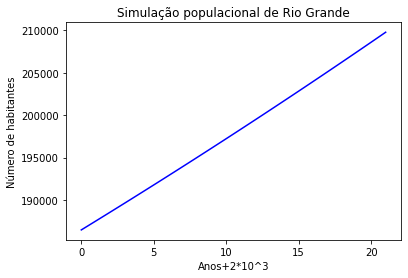

Simulação para 2021: 209760.60281646045


In [12]:
#Solução pelo SymPy
plt.plot(t,186488*np.exp(0.0056*t),"b") 

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos+2*10^3")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",186488*np.exp(0.0056*21))

<h3>SciPy (LSODA)</h3>

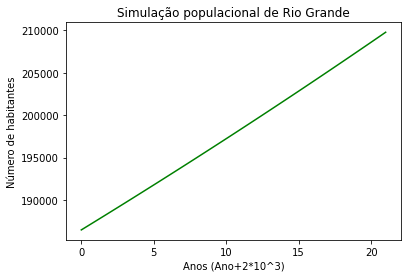

Simulação para 2021: [209760.59999083]


In [13]:
#Solução pelo LSODA
plt.plot(t,sol1,"g")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol1[sol1.shape[0]-1])

<h3>SciPy (RK45)</h3>

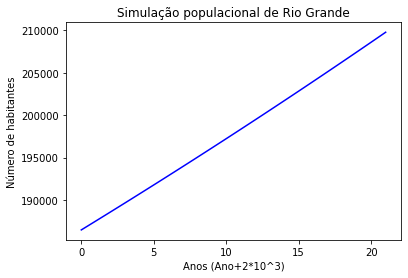

Simulação para 2021: 209760.60286601182


In [14]:
#solução pelo SciPy (RK45)
plt.plot(t,sol2.y[0],"b")

#Exibindo figura
plt.title("Simulação populacional de Rio Grande")
plt.xlabel("Anos (Ano+2*10^3)")
plt.ylabel("Número de habitantes")
plt.show()

print("Simulação para 2021:",sol2.y[0][sol2.y[0].shape[0]-1])